In [37]:
!pip install py-tgb

In [39]:
!git clone https://github.com/shenyangHuang/TGB.git

Cloning into 'TGB'...
remote: Enumerating objects: 2720, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 2720 (delta 121), reused 167 (delta 107), pack-reused 2445
Receiving objects: 100% (2720/2720), 5.39 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (1557/1557), done.


In [79]:
from tgb.linkproppred.dataset_pyg import PyGLinkPropPredDataset


In [84]:
name = "tgbl-wiki"
dataset = PyGLinkPropPredDataset(name=name, root="datasets")

raw file found, skipping download
Dataset directory is  /usr/local/lib/python3.10/dist-packages/tgb/datasets/tgbl_wiki
loading processed file


In [187]:
data = dataset.get_TemporalData()

In [188]:
data

TemporalData(src=[157474], dst=[157474], t=[157474], msg=[157474, 172], y=[157474])

In [189]:
dataset.test_mask.sum()

tensor(23621)

In [190]:
dataset.train_mask.sum()

tensor(110232)

In [191]:
dataset.val_mask.sum()

tensor(23621)

In [192]:
c = np.logical_or(dataset.test_mask, dataset.val_mask)
c = c.bool()

In [193]:
# data = data[c]

In [194]:
dataset.test_mask

tensor([False, False, False,  ...,  True,  True,  True])

In [195]:
c

tensor([False, False, False,  ...,  True,  True,  True])

In [196]:
data = data[dataset.test_mask]

In [197]:
data.keys()

['y', 'msg', 'src', 'dst', 't']

In [198]:
data['src']

tensor([3173, 7326, 7325,  ..., 2399, 7479, 2399])

In [199]:
data['dst']

tensor([8267, 8491, 8348,  ..., 8722, 9147, 8722])

In [207]:
data['t']

tensor([2218300, 2218303, 2218304,  ..., 2678293, 2678333, 2678373])

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [208]:
len(data['t'])

23621

In [200]:
data['t'].shape

torch.Size([23621])

In [201]:
len(data['dst'])

23621

In [203]:
pair_cnt = {}

for source, dest in zip(data['src'], data['dst']):
  pair = (source.item(), dest.item())
  if pair in pair_cnt:
    pair_cnt[pair] += 1
  else:
    pair_cnt[pair] = 1

In [204]:
sorted_pair_cnt = dict(sorted(pair_cnt.items(), key=lambda item: -1 * item[1]))

In [213]:
counter = 0
for pair, cnt in sorted_pair_cnt.items():
  print(pair, cnt)
  counter += 1

  if counter == 100:
    break

(5791, 9146) 198
(6862, 9196) 170
(615, 9212) 169
(5467, 9118) 164
(671, 8935) 153
(205, 8689) 151
(1296, 9226) 147
(1244, 9041) 135
(7576, 9217) 134
(1296, 9061) 134
(3762, 9025) 129
(7522, 9213) 127
(2846, 8988) 118
(1074, 9056) 113
(3880, 8762) 110
(5320, 8499) 107
(3491, 8701) 106
(224, 8393) 106
(1087, 9220) 105
(2000, 8850) 104
(145, 8612) 101
(898, 9221) 101
(94, 9090) 96
(4107, 9047) 95
(221, 8734) 92
(1802, 8250) 89
(134, 8340) 89
(1089, 9218) 89
(1101, 8758) 88
(366, 8472) 87
(5294, 9108) 87
(600, 9216) 87
(400, 8817) 86
(1066, 9197) 86
(1087, 9225) 85
(7656, 9219) 84
(2345, 8901) 83
(512, 9207) 82
(2003, 8859) 82
(422, 9222) 82
(7214, 9208) 79
(2836, 9209) 79
(1478, 8773) 78
(7362, 9211) 76
(7479, 9147) 76
(1250, 8731) 75
(7175, 9206) 75
(879, 8834) 75
(6545, 9180) 74
(6179, 9045) 74
(1181, 8711) 70
(2268, 8890) 70
(559, 8491) 68
(142, 9168) 66
(7486, 9160) 65
(6747, 8550) 64
(6752, 9097) 64
(3029, 9004) 63
(46, 8270) 63
(442, 9214) 63
(442, 8504) 62
(7947, 9021) 62
(5968, 9

In [183]:
max(pair_cnt.values())

1

In [36]:
first_pair, cnt = next(iter(sorted_pair_cnt.items()))
first_pair, cnt

((134, 8340), 1161)

In [27]:
def get_timestamps(data, pair):
  timestamps = []
  for source, dest, timestamp in zip(data['sources'], data['destinations'], data['timestamps']):
    if source == pair[0] and dest == pair[1]:
      timestamps.append(timestamp)
  return timestamps

In [30]:
timestamps = get_timestamps(data, first_pair)
len(timestamps)

1161

In [35]:
timestamps[10]

23568.0

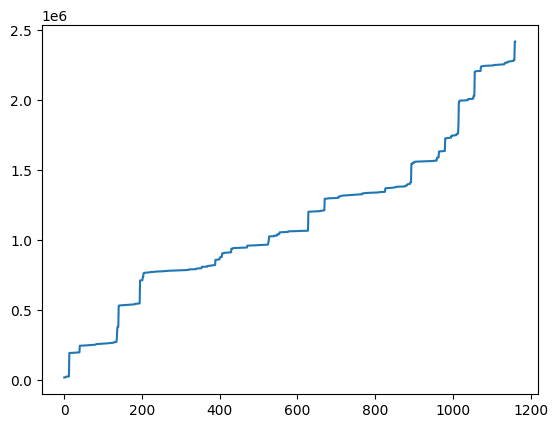

In [31]:
from matplotlib import pyplot as plt

plt.plot(timestamps)

In [54]:
pair = first_pair
pair

(134, 8340)

In [61]:
sources = []
destinations = []
timestamps = []
for source, dest, timestamp in zip(data['sources'], data['destinations'], data['timestamps']):
  if source == pair[0] and dest == pair[1]:
    timestamps.append(timestamp)
    sources.append(source)
    destinations.append(source)

# sources = np.array(sources)
# destinations = np.array(destinations)
# timestamps = np.array(timestamps)

In [65]:
str(sources)

'[134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134

In [64]:
str(timestamps)

'[16732.0, 16919.0, 17086.0, 17136.0, 20869.0, 22345.0, 22373.0, 22993.0, 23510.0, 23538.0, 23568.0, 23625.0, 23644.0, 191708.0, 191904.0, 191993.0, 192205.0, 192299.0, 192363.0, 192428.0, 192732.0, 192912.0, 193027.0, 193584.0, 193644.0, 193690.0, 193763.0, 193841.0, 193923.0, 194008.0, 194096.0, 195093.0, 195137.0, 195424.0, 195482.0, 195601.0, 195739.0, 195873.0, 196027.0, 196183.0, 243590.0, 243661.0, 243940.0, 243983.0, 244320.0, 244703.0, 244752.0, 244811.0, 244846.0, 244911.0, 245093.0, 245184.0, 245461.0, 245541.0, 245599.0, 245859.0, 245945.0, 246087.0, 246444.0, 246611.0, 246763.0, 246955.0, 247057.0, 247505.0, 247554.0, 247583.0, 247761.0, 248026.0, 248167.0, 248727.0, 249120.0, 249710.0, 249786.0, 249885.0, 250156.0, 250184.0, 250236.0, 250310.0, 250471.0, 250521.0, 251940.0, 252627.0, 255337.0, 255385.0, 255559.0, 255983.0, 256538.0, 256602.0, 256710.0, 256788.0, 257288.0, 257475.0, 257641.0, 257734.0, 257781.0, 257944.0, 258058.0, 258284.0, 258438.0, 258723.0, 258894.0, 2

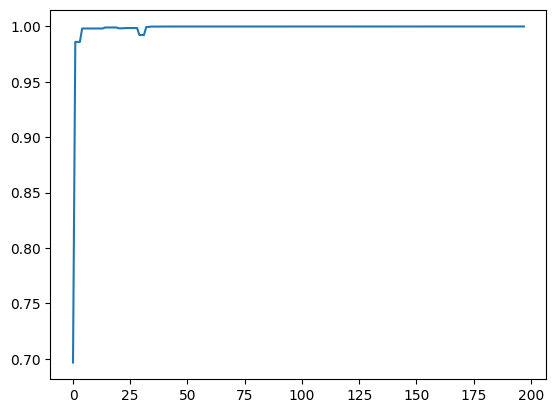

In [211]:
plt.plot([0.6966916918754578, 0.9860804677009583, 0.9860804677009583, 0.9860804677009583, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9981822967529297, 0.9990888833999634, 0.9990888833999634, 0.9990888833999634, 0.9990888833999634, 0.9990888833999634, 0.9990888833999634, 0.9983527660369873, 0.9983527660369873, 0.9983527660369873, 0.9985841512680054, 0.9985841512680054, 0.9985841512680054, 0.9985841512680054, 0.9985841512680054, 0.9985841512680054, 0.9923239946365356, 0.9923239946365356, 0.9923239946365356, 0.9995571970939636, 0.9995571970939636, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9998775720596313, 0.9999629259109497, 0.9999629259109497, 0.9999803304672241, 0.9999803304672241, 0.9999803304672241, 0.9999803304672241, 0.999964714050293, 0.999964714050293, 0.999964714050293, 0.9999957084655762, 0.9999957084655762, 0.9999957084655762, 0.9999957084655762, 0.9999957084655762, 0.9999957084655762, 0.9999936819076538, 0.9999936819076538, 0.9999936819076538, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999889135360718, 0.9999957084655762, 0.9999957084655762, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999971389770508, 0.9999984502792358, 0.9999984502792358, 0.9999984502792358, 0.9999947547912598, 0.9999979734420776, 0.9999979734420776, 0.9999974966049194, 0.9999974966049194, 0.9999986886978149, 0.9999986886978149, 0.9999973773956299, 0.9999973773956299, 0.9999973773956299, 0.9999973773956299, 0.9999973773956299, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999996423721313, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999991655349731, 0.9999991655349731, 0.9999998807907104, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999998807907104, 0.9999998807907104, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.9999995231628418, 0.999998927116394, 0.999998927116394, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999992847442627, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999997615814209, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999998807907104, 0.9999997615814209, 0.9999997615814209])

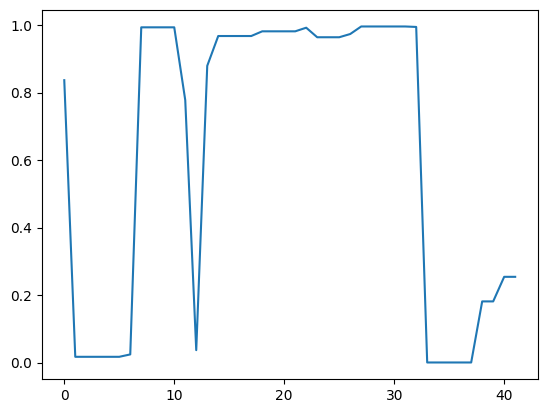

In [214]:
plt.plot([0.836663544178009, 0.017139390110969543, 0.017139390110969543, 0.017139390110969543, 0.017139390110969543, 0.017139390110969543, 0.024223605170845985, 0.9932795166969299, 0.9932795166969299, 0.9932795166969299, 0.9932795166969299, 0.7777556777000427, 0.03685849532485008, 0.8792458176612854, 0.9675284624099731, 0.9675284624099731, 0.9675284624099731, 0.9675284624099731, 0.981442391872406, 0.981442391872406, 0.981442391872406, 0.981442391872406, 0.9921514987945557, 0.9638796448707581, 0.9638796448707581, 0.9638796448707581, 0.9734542965888977, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.9957979321479797, 0.994429886341095, 0.00033859378891065717, 0.00033859378891065717, 0.00033859378891065717, 0.00033859378891065717, 0.00033859378891065717, 0.18128497898578644, 0.18128497898578644, 0.254107266664505, 0.254107266664505])